## ASSIGNMENT 4

#### a) Create collections “flights” inside database “airline_delayDB”

In [9]:
import pymongo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
client = pymongo.MongoClient("localhost:27017")
db = client['airline_delayDB']
collection = db['flights']
            

#### b)How would you insert this entire dataset into a MongoDB collection named flights? Describe the structure of each document.

In [13]:
flights_df = pd.read_csv("D:/Flights_Delay.csv")

mean_val = flights_df['ARRIVAL_DELAY'].mean()
mean_val2= flights_df['DEPARTURE_DELAY'].mean()
flights_df['ARRIVAL_DELAY'].fillna(mean_val,inplace=True) 
flights_df['DEPARTURE_DELAY'].fillna(mean_val2,inplace=True) 


records = flights_df.to_dict(orient = 'records')


C:\Users\Administrator\AppData\Local\Temp\ipykernel_5052\2567195274.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  flights_df['ARRIVAL_DELAY'].fillna(mean_val,inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5052\2567195274.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [15]:
if records:
    collection.insert_many(records)
allDoc = collection.find()
# for i in allDoc:
#     print(i)


#### c) Write a MongoDB command to insert a single flight record from the dataset.

In [123]:
record1={'ID': 4, 'YEAR': 2015, 'MONTH': 2, 'DAY': 5, 'DAY_OF_WEEK': 4, 'AIRLINE': 'EV', 
         'FLIGHT_NUMBER': 5584, 'TAIL_NUMBER': 'N851AS', 'ORIGIN_AIRPORT': 'ATL', 'DESTINATION_AIRPORT': 'AVL', 'SCHEDULED_DEPARTURE': 1255, 
         'DEPARTURE_TIME': 1250.0, 'DEPARTURE_DELAY': -5.0, 'TAXI_OUT': 25.0, 'WHEELS_OFF': 1315.0, 'SCHEDULED_TIME': 48, 'ELAPSED_TIME': 62.0, 
         'AIR_TIME': 34.0, 'DISTANCE': 164, 'WHEELS_ON': 1349.0, 'TAXI_IN': 3.0, 'SCHEDULED_ARRIVAL': 1343, 'ARRIVAL_TIME': 1352.0, 'ARRIVAL_DELAY': 9.0, 
         'DIVERTED': 0, 'CANCELLED': 0, 'CANCELLATION_REASON': 0, 'AIR_SYSTEM_DELAY': 0, 'SECURITY_DELAY': 0, 'AIRLINE_DELAY': 0, 
         'LATE_AIRCRAFT_DELAY': 0, 'WEATHER_DELAY': 0}
collection.insert_one(record1)

InsertOneResult(ObjectId('66d414262a6e4ae9394d0300'), acknowledged=True)

#### d) Write a MongoDB query to find all flights that were delayed by more than 60 minutes.

In [127]:
list(collection.find({"DEPARTURE_DELAY":{"$gt":60}}).limit(5))

[{'_id': ObjectId('66d3fc0b2a6e4ae9394b4d81'),
  'ID': 2,
  'YEAR': 2015,
  'MONTH': 1,
  'DAY': 27,
  'DAY_OF_WEEK': 2,
  'AIRLINE': 'B6',
  'FLIGHT_NUMBER': 716,
  'TAIL_NUMBER': 'N309JB',
  'ORIGIN_AIRPORT': 'JAX',
  'DESTINATION_AIRPORT': 'DCA',
  'SCHEDULED_DEPARTURE': 1335,
  'DEPARTURE_TIME': 1505.0,
  'DEPARTURE_DELAY': 90.0,
  'TAXI_OUT': 16.0,
  'WHEELS_OFF': 1521.0,
  'SCHEDULED_TIME': 104,
  'ELAPSED_TIME': 110.0,
  'AIR_TIME': 91.0,
  'DISTANCE': 634,
  'WHEELS_ON': 1652.0,
  'TAXI_IN': 3.0,
  'SCHEDULED_ARRIVAL': 1519,
  'ARRIVAL_TIME': 1655.0,
  'ARRIVAL_DELAY': 96.0,
  'DIVERTED': 0,
  'CANCELLED': 0,
  'CANCELLATION_REASON': nan,
  'AIR_SYSTEM_DELAY': 6.0,
  'SECURITY_DELAY': 0.0,
  'AIRLINE_DELAY': 90.0,
  'LATE_AIRCRAFT_DELAY': 0.0,
  'WEATHER_DELAY': 0.0},
 {'_id': ObjectId('66d3fc0b2a6e4ae9394b4d91'),
  'ID': 18,
  'YEAR': 2015,
  'MONTH': 2,
  'DAY': 24,
  'DAY_OF_WEEK': 2,
  'AIRLINE': 'OO',
  'FLIGHT_NUMBER': 6196,
  'TAIL_NUMBER': 'N751SK',
  'ORIGIN_AIRPORT': 

#### e)How would you query all flights that were cancelled (CANCELLED flag set to 1) and return only the AIRLINE, ORIGIN_AIRPORT, and CANCELLATION_REASON fields?

In [129]:
result = list(db.flights.find({"CANCELLED":1},{"_id":0,"AIRLINE":1,"ORIGIN_AIRPORT":1,"CANCELLATION_REASON":1}).limit(5))
result

[{'AIRLINE': 'EV', 'ORIGIN_AIRPORT': 'MLI', 'CANCELLATION_REASON': 'C'},
 {'AIRLINE': 'WN', 'ORIGIN_AIRPORT': 'BWI', 'CANCELLATION_REASON': 'B'},
 {'AIRLINE': 'DL', 'ORIGIN_AIRPORT': 'SFO', 'CANCELLATION_REASON': 'B'},
 {'AIRLINE': 'AA', 'ORIGIN_AIRPORT': 'DFW', 'CANCELLATION_REASON': 'B'},
 {'AIRLINE': 'MQ', 'ORIGIN_AIRPORT': 'LGA', 'CANCELLATION_REASON': 'B'}]

#### f) Using MongoDB’s aggregation framework, how would you calculate the average arrival delay (ARRIVAL_DELAY) for each airline? [Create a suitable plot using matplotlib/seaborn]


In [115]:
result = list(db.flights.aggregate([{"$match":{"ARRIVAL_DELAY":{"$gte":0}}},
                                    {"$group":{"_id":"$AIRLINE","avgDelay":{"$avg":"$ARRIVAL_DELAY"}}},
                                    {"$limit":10}]))
result

[{'_id': 'EV', 'avgDelay': 31.55543418536991},
 {'_id': 'B6', 'avgDelay': 37.38081750517444},
 {'_id': 'AS', 'avgDelay': 22.778367691928338},
 {'_id': 'MQ', 'avgDelay': 34.63287251389703},
 {'_id': 'US', 'avgDelay': 26.031265614525374},
 {'_id': 'DL', 'avgDelay': 32.73050485625549},
 {'_id': 'OO', 'avgDelay': 33.66620961052195},
 {'_id': 'WN', 'avgDelay': 24.607200346070872},
 {'_id': 'HA', 'avgDelay': 14.69696973367365},
 {'_id': 'UA', 'avgDelay': 30.9540183438892}]

Text(0, 0.5, 'Average Delay')

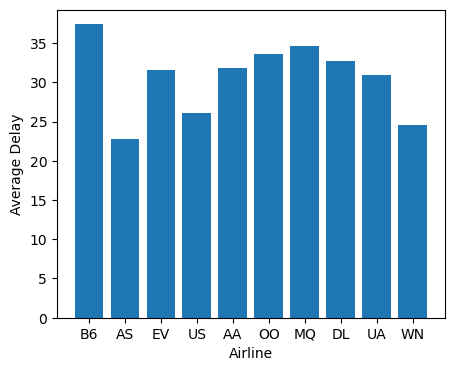

In [103]:
df = pd.DataFrame(result)
plt.figure(figsize=(5,4))
plt.bar(df['_id'],df['avgDelay'])
plt.xlabel("Airline")
plt.ylabel("Average Delay")


#### g) Days of months with respect to average of arrival delays. [Create a suitable plot using matplotlib/seaborn]

In [107]:
result  = list(db.flights.aggregate([{"$match":{"ARRIVAL_DELAY":{"$gte":0}}},
                                    {"$project":{"DAY":1,"ARRIVAL_DELAY":1}},
                                    {"$group":{"_id":"$DAY","avgArrDel":{"$avg":"$ARRIVAL_DELAY"}}},
                                    {"$limit":10}]))
result

[{'_id': 14, 'avgArrDel': 23.912653153991442},
 {'_id': 12, 'avgArrDel': 33.766616733907384},
 {'_id': 30, 'avgArrDel': 30.79519039295561},
 {'_id': 11, 'avgArrDel': 30.361217965587528},
 {'_id': 27, 'avgArrDel': 27.40927381989598},
 {'_id': 28, 'avgArrDel': 27.54588458110582},
 {'_id': 21, 'avgArrDel': 30.641935374500175},
 {'_id': 17, 'avgArrDel': 33.267078600789645},
 {'_id': 3, 'avgArrDel': 37.85353902092936},
 {'_id': 4, 'avgArrDel': 37.97518519778495}]

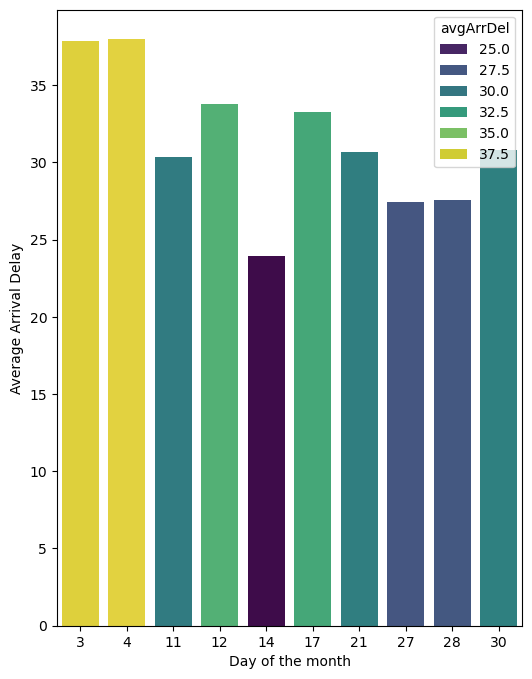

In [113]:
result_df=pd.DataFrame(result)
plt.figure(figsize=(6,8))
sns.barplot(data=result_df,x='_id',y='avgArrDel',hue = 'avgArrDel',palette='viridis')
plt.xlabel("Day of the month")
plt.ylabel("Average Arrival Delay")
plt.show()

#### h)Write a MongoDB aggregation pipeline to find the top 10 airports with the highest average total delay (DEPARTURE_DELAY + ARRIVAL DELAY).

In [127]:
result = list(db.flights.aggregate([{"$match":{"DEPARTURE_DELAY":{"$gt":0},"ARRIVAL_DELAY":{"$gt":0}}},
                        {"$addFields":{"total_delay":{"$add":["$DEPARTURE_DELAY","$ARRIVAL_DELAY"]}}},
                          {"$group":{'_id':"$ORIGIN_AIRPORT","avgTotDel":{"$avg":"$total_delay"}}},
                          {"$sort":{"avgTotDel":-1}},
                          {"$limit":10}]))
result

[{'_id': 'CDC', 'avgTotDel': 1082.0},
 {'_id': 'PIH', 'avgTotDel': 964.0},
 {'_id': 'HOB', 'avgTotDel': 772.0},
 {'_id': 'ILG', 'avgTotDel': 551.0},
 {'_id': 'SCE', 'avgTotDel': 500.5},
 {'_id': 'HIB', 'avgTotDel': 473.0},
 {'_id': 'BRW', 'avgTotDel': 329.5},
 {'_id': 'JLN', 'avgTotDel': 327.47333566933116},
 {'_id': 'DLH', 'avgTotDel': 312.0},
 {'_id': 'AVL', 'avgTotDel': 298.6}]

#### i)Explain how you would create an index on the ORIGIN_AIRPORT and DESTINATION_AIRPORT fields to optimize queries filtering by these fields.

In [96]:
list[db.flights.create_index({"ORIGIN_AIRPORT":1,"DESTINATION_AIRPORT":1})]

list['ORIGIN_AIRPORT_1_DESTINATION_AIRPORT_1']

#### j)Arrange weekdays with respect to the average arrival delays caused. [Create a suitable plot using matplotlib/seaborn]


In [135]:
result = list(db.flights.aggregate([{"$group":{"_id":"$DAY_OF_WEEK","avgArrDel":{"$avg":"$ARRIVAL_DELAY"}}},{"$sort":{"avgArrDel":-1}},{"$limit":10}]))
result

[{'_id': 1, 'avgArrDel': 10.602689477834318},
 {'_id': 7, 'avgArrDel': 9.967281279411091},
 {'_id': 2, 'avgArrDel': 8.009564013571655},
 {'_id': 4, 'avgArrDel': 7.189419787708068},
 {'_id': 5, 'avgArrDel': 6.037484969310992},
 {'_id': 3, 'avgArrDel': 5.651814981074193},
 {'_id': 6, 'avgArrDel': 4.969349318370331}]

Text(0, 0.5, 'Average Arrival Delay')

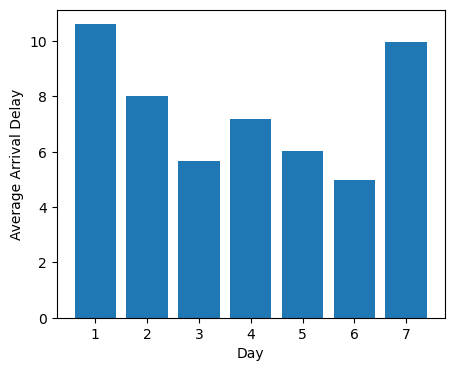

In [104]:
df = pd.DataFrame(result)
plt.figure(figsize=(5,4))
plt.bar(df['_id'],df['avgArrDel'])
plt.xlabel("Day")
plt.ylabel("Average Arrival Delay")

#### k)Arrange Days of month as per cancellations done in descending order.  [Create a suitable plot using matplotlib/seaborn]


In [137]:
result = list(db.flights.aggregate([{"$match":{"CANCELLED":1}},
                                    {"$group":{"_id":"$DAY","total":{"$sum":1}}},
                                    {"$sort":{"total":1}},
                                   {"$limit":10}]))
result

[{'_id': 29, 'total': 6},
 {'_id': 30, 'total': 14},
 {'_id': 31, 'total': 18},
 {'_id': 19, 'total': 18},
 {'_id': 13, 'total': 28},
 {'_id': 18, 'total': 28},
 {'_id': 12, 'total': 40},
 {'_id': 20, 'total': 42},
 {'_id': 11, 'total': 48},
 {'_id': 10, 'total': 54}]

Text(0, 0.5, 'Total Cancellations')

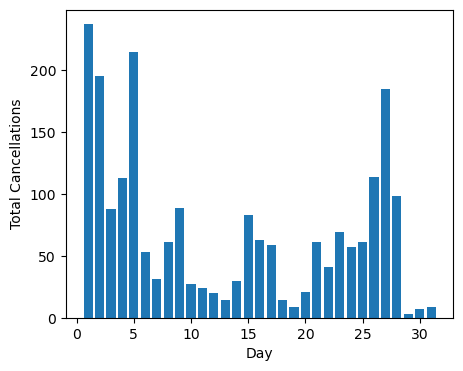

In [115]:
df = pd.DataFrame(result)
plt.figure(figsize=(5,4))
plt.bar(df['_id'],df['total'])
plt.xlabel("Day")
plt.ylabel("Total Cancellations")

#### l)Find the busiest airports with respect to day of week. Represent it by using suitable plot.

In [141]:
result = list(db.flights.aggregate([{'$group':{'_id':{'airport':'$ORIGIN_AIRPORT','day':'$DAY_OF_WEEK'},'flight_count':{'$sum':1}}},
{'$sort': { '_id': 1, 'flight_count': -1 }},{"$limit":10}]))
result

[{'_id': {'airport': 'ABE', 'day': 1}, 'flight_count': 4},
 {'_id': {'airport': 'ABE', 'day': 2}, 'flight_count': 1},
 {'_id': {'airport': 'ABE', 'day': 3}, 'flight_count': 2},
 {'_id': {'airport': 'ABE', 'day': 4}, 'flight_count': 1},
 {'_id': {'airport': 'ABE', 'day': 5}, 'flight_count': 3},
 {'_id': {'airport': 'ABE', 'day': 6}, 'flight_count': 1},
 {'_id': {'airport': 'ABE', 'day': 7}, 'flight_count': 5},
 {'_id': {'airport': 'ABI', 'day': 1}, 'flight_count': 5},
 {'_id': {'airport': 'ABI', 'day': 2}, 'flight_count': 5},
 {'_id': {'airport': 'ABI', 'day': 3}, 'flight_count': 4}]

#### m)Find top 10 Airlines of US. Represent it by using suitable plot.


In [81]:
result = list(db.flights.aggregate([{"$match": {"AIRLINE": {"$ne": ""}}}, 
    {"$group": {"_id": "$AIRLINE", "count": {"$sum": 1}}}, 
    {"$sort": {"count": -1}},
    {"$limit": 10} 
]))
result

[{'_id': 'WN', 'count': 11738},
 {'_id': 'DL', 'count': 7989},
 {'_id': 'EV', 'count': 5916},
 {'_id': 'OO', 'count': 5708},
 {'_id': 'AA', 'count': 5250},
 {'_id': 'UA', 'count': 4701},
 {'_id': 'US', 'count': 3925},
 {'_id': 'MQ', 'count': 3502},
 {'_id': 'B6', 'count': 2548},
 {'_id': 'AS', 'count': 1586}]

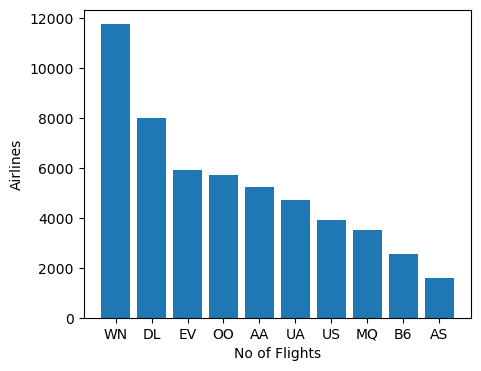

In [83]:
df=pd.DataFrame(result)
plt.figure(figsize=(5,4))
plt.bar(df['_id'],df['count'])
plt.xlabel("No of Flights")
plt.ylabel("Airlines")
plt.show()

#### n)Finding airlines that make the maximum, minimum number of cancellations.


In [133]:
result = list(db.flights.aggregate([{"$match":{"CANCELLED":1}},
                                   {"$group":{"_id":"$AIRLINE","noOfCan":{"$sum":1}}},
                                   {"$sort":{"noOfCan":-1}},
                                   {"$facet":{"max_cancellation":[{"$limit":1}],"min_cancellations":[{"$sort":{"noOfCan":1}},{"$limit":1}]}}]))
result

[{'max_cancellation': [{'_id': 'MQ', 'noOfCan': 414}],
  'min_cancellations': [{'_id': 'HA', 'noOfCan': 3}]}]

#### o)Find and show airlines names in descending that make the most number of diversions made. [Create a suitable plot using matplotlib/seaborn]


In [91]:
result = list(db.flights.aggregate([{"$match":{"DIVERTED":1}},
                                   {"$group":{"_id":"$AIRLINE","noOfDiversions":{"$sum":1}}},
                                   {"$sort":{"noOfDiversions":-1}}]))
result

[{'_id': 'WN', 'noOfDiversions': 35},
 {'_id': 'OO', 'noOfDiversions': 25},
 {'_id': 'EV', 'noOfDiversions': 22},
 {'_id': 'DL', 'noOfDiversions': 18},
 {'_id': 'B6', 'noOfDiversions': 16},
 {'_id': 'AA', 'noOfDiversions': 12},
 {'_id': 'US', 'noOfDiversions': 9},
 {'_id': 'UA', 'noOfDiversions': 8},
 {'_id': 'MQ', 'noOfDiversions': 5},
 {'_id': 'HA', 'noOfDiversions': 1}]

Text(0, 0.5, 'No of Diversions')

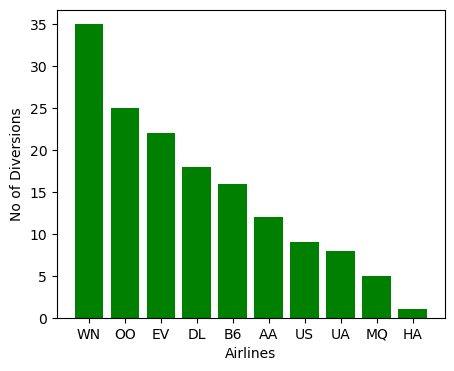

In [95]:
df = pd.DataFrame(result)
plt.figure(figsize=(5,4))
plt.bar(df['_id'],df['noOfDiversions'],color='green')
plt.xlabel("Airlines")
plt.ylabel("No of Diversions")

#### p)Finding days of month that see the most number of diversion and delays

In [77]:
results = list(collection.aggregate([
    {"$match": {
        "DIVERTED": 1,
        "$or": [
            {"DEPARTURE_DELAY": {"$gt":0}},
            {"ARRIVAL_DELAY": {"$gt":0}}
        ]
    }},
    {"$group": {
        "_id": "$DAY",
        "diversions_and_delays": {"$sum": 1},
    }},
    {"$sort": {
        "diversions_and_delays": -1
    }},
]))
results

[{'_id': 2, 'diversions_and_delays': 15},
 {'_id': 1, 'diversions_and_delays': 13},
 {'_id': 4, 'diversions_and_delays': 12},
 {'_id': 5, 'diversions_and_delays': 11},
 {'_id': 9, 'diversions_and_delays': 9},
 {'_id': 14, 'diversions_and_delays': 8},
 {'_id': 6, 'diversions_and_delays': 7},
 {'_id': 7, 'diversions_and_delays': 6},
 {'_id': 23, 'diversions_and_delays': 6},
 {'_id': 11, 'diversions_and_delays': 5},
 {'_id': 30, 'diversions_and_delays': 5},
 {'_id': 3, 'diversions_and_delays': 5},
 {'_id': 8, 'diversions_and_delays': 5},
 {'_id': 18, 'diversions_and_delays': 5},
 {'_id': 12, 'diversions_and_delays': 4},
 {'_id': 21, 'diversions_and_delays': 4},
 {'_id': 28, 'diversions_and_delays': 4},
 {'_id': 16, 'diversions_and_delays': 4},
 {'_id': 20, 'diversions_and_delays': 4},
 {'_id': 26, 'diversions_and_delays': 3},
 {'_id': 31, 'diversions_and_delays': 3},
 {'_id': 17, 'diversions_and_delays': 3},
 {'_id': 27, 'diversions_and_delays': 3},
 {'_id': 13, 'diversions_and_delays': 2

#### q)Write a MongoDB query to find the flights with the shortest and longest AIR_TIME. Return the flightNumber, airline, and AIR_TIME.

In [156]:
result = list(db.flights.aggregate([{"$project":{"_id":0,"FLIGHT_NUMBER":1,"AIRLINE":1,"AIR_TIME":1}},
                                   {"$sort":{"AIR_TIME":-1}},
                                   {"$facet":{"longest":[{"$limit":1}],"shortest":[{"$sort":{"AIR_TIME":1}},{"$limit":1}]}}]))
result

[{'longest': [{'AIRLINE': 'UA', 'FLIGHT_NUMBER': 15, 'AIR_TIME': 654.0}],
  'shortest': [{'AIRLINE': 'EV', 'FLIGHT_NUMBER': 6172, 'AIR_TIME': nan}]}]

#### r)Finding all diverted Route from a source to destination Airport & which route is the most diverted route.


In [145]:
result = list(db.flights.aggregate( [{"$match": {"DIVERTED": 1}},
    {"$group": {"_id": {"origin": "$ORIGIN_AIRPORT", "destination": "$DESTINATION_AIRPORT"},"diversion_count": {"$sum": 1}}},
    {"$sort": {"diversion_count": -1}},
    {"$limit":10}]))
result

[{'_id': {'origin': 'STT', 'destination': 'PHL'}, 'diversion_count': 4},
 {'_id': {'origin': 'JFK', 'destination': 'SEA'}, 'diversion_count': 4},
 {'_id': {'origin': 'IAH', 'destination': 'ASE'}, 'diversion_count': 4},
 {'_id': {'origin': 'HOU', 'destination': 'DAL'}, 'diversion_count': 4},
 {'_id': {'origin': 'TPA', 'destination': 'LGA'}, 'diversion_count': 4},
 {'_id': {'origin': 'JFK', 'destination': 'EGE'}, 'diversion_count': 4},
 {'_id': {'origin': 'CLT', 'destination': 'IAH'}, 'diversion_count': 4},
 {'_id': {'origin': 'PHL', 'destination': 'SAN'}, 'diversion_count': 4},
 {'_id': {'origin': 'ORD', 'destination': 'ASE'}, 'diversion_count': 4},
 {'_id': {'origin': 'SFO', 'destination': 'SNA'}, 'diversion_count': 2}]

#### s)Write a MongoDB aggregation pipeline to calculate the all aggregated values for departure delay (DEPARTURE_DELAY) and arrival delay (ARRIVAL_DELAY) for each airline, excluding flights that were either cancelled or diverted

In [147]:
result = list(db.flights.aggregate([{"$match":{"CANCELLED":0,"DIVERTED":0}},
                                  {"$group":{"_id":"$AIRLINE","total_delay":{"$sum":"$DEPARTURE_DELAY"},
                                             "avg_delay":{"$avg":"$DEPARTURE_DELAY"},"min_delay":{"$min":"$DEPARTURE_DELAY"},
                                             "max_delay":{"$max":"$DEPARTURE_DELAY"}}},
                                   {"$limit":10}]))
result

[{'_id': 'VX',
  'total_delay': 11040.0,
  'avg_delay': 9.857142857142858,
  'min_delay': -15.0,
  'max_delay': 309.0},
 {'_id': 'AS',
  'total_delay': 7280.0,
  'avg_delay': 2.312579415501906,
  'min_delay': -42.0,
  'max_delay': 400.0},
 {'_id': 'DL',
  'total_delay': 154676.0,
  'avg_delay': 9.922761098280729,
  'min_delay': -26.0,
  'max_delay': 1166.0},
 {'_id': 'UA',
  'total_delay': 129520.0,
  'avg_delay': 14.167578210457231,
  'min_delay': -23.0,
  'max_delay': 473.0},
 {'_id': 'B6',
  'total_delay': 75850.0,
  'avg_delay': 15.888144113950565,
  'min_delay': -24.0,
  'max_delay': 468.0},
 {'_id': 'EV',
  'total_delay': 127537.0,
  'avg_delay': 11.422928795342589,
  'min_delay': -24.0,
  'max_delay': 526.0},
 {'_id': 'OO',
  'total_delay': 126870.0,
  'avg_delay': 11.471066907775768,
  'min_delay': -36.0,
  'max_delay': 540.0},
 {'_id': 'HA',
  'total_delay': 1710.0,
  'avg_delay': 1.190807799442897,
  'min_delay': -17.0,
  'max_delay': 715.0},
 {'_id': 'AA',
  'total_delay': 1

In [165]:
result = list(db.flights.aggregate([{"$match":{"CANCELLED":0,"DIVERTED":0}},
                                  {"$group":{"_id":"$AIRLINE","total_delay":{"$sum":"$ARRIVAL_DELAY"},
                                             "avg_delay":{"$avg":"$ARRIVAL_DELAY"},"min_delay":{"$min":"$ARRIVAL_DELAY"},
                                             "max_delay":{"$max":"$ARRIVAL_DELAY"}}}]))
result

[{'_id': 'UA',
  'total_delay': 30613.0,
  'avg_delay': 6.697221614526362,
  'min_delay': -56.0,
  'max_delay': 470.0},
 {'_id': 'DL',
  'total_delay': 21936.0,
  'avg_delay': 2.8144726712856043,
  'min_delay': -62.0,
  'max_delay': 1170.0},
 {'_id': 'OO',
  'total_delay': 56156.0,
  'avg_delay': 10.154792043399638,
  'min_delay': -50.0,
  'max_delay': 542.0},
 {'_id': 'AS',
  'total_delay': -2411.0,
  'avg_delay': -1.531766200762389,
  'min_delay': -61.0,
  'max_delay': 407.0},
 {'_id': 'B6',
  'total_delay': 33319.0,
  'avg_delay': 13.95852534562212,
  'min_delay': -76.0,
  'max_delay': 522.0},
 {'_id': 'WN',
  'total_delay': 41952.0,
  'avg_delay': 3.697840458351697,
  'min_delay': -73.0,
  'max_delay': 521.0},
 {'_id': 'F9',
  'total_delay': 18873.0,
  'avg_delay': 24.103448275862068,
  'min_delay': -38.0,
  'max_delay': 505.0},
 {'_id': 'AA',
  'total_delay': 41908.0,
  'avg_delay': 8.386631979187513,
  'min_delay': -62.0,
  'max_delay': 1295.0},
 {'_id': 'VX',
  'total_delay': 28

#### t)Write a MongoDB query to find all flights that were delayed due to WEATHER_DELAY but were not cancelled or diverted. Include the flightNumber, airline, originAirport, and destinationAirport in the results.

In [151]:
result = list(db.flights.find({"WEATHER_DELAY": {"$gt": 0},"CANCELLED": 0,"DIVERTED": 0},
                             {"FLIGHT_NUMBER": 1, "AIRLINE": 1,"ORIGIN_AIRPORT": 1,"DESTINATION_AIRPORT": 1,"_id": 0}).limit(10))
result

[{'AIRLINE': 'UA',
  'FLIGHT_NUMBER': 532,
  'ORIGIN_AIRPORT': 'ORD',
  'DESTINATION_AIRPORT': 'DCA'},
 {'AIRLINE': 'US',
  'FLIGHT_NUMBER': 1784,
  'ORIGIN_AIRPORT': 'BWI',
  'DESTINATION_AIRPORT': 'PHX'},
 {'AIRLINE': 'MQ',
  'FLIGHT_NUMBER': 3019,
  'ORIGIN_AIRPORT': 'ORD',
  'DESTINATION_AIRPORT': 'OKC'},
 {'AIRLINE': 'MQ',
  'FLIGHT_NUMBER': 3564,
  'ORIGIN_AIRPORT': 'GSO',
  'DESTINATION_AIRPORT': 'LGA'},
 {'AIRLINE': 'UA',
  'FLIGHT_NUMBER': 1667,
  'ORIGIN_AIRPORT': 'ORD',
  'DESTINATION_AIRPORT': 'PDX'},
 {'AIRLINE': 'DL',
  'FLIGHT_NUMBER': 1788,
  'ORIGIN_AIRPORT': 'ATL',
  'DESTINATION_AIRPORT': 'MEM'},
 {'AIRLINE': 'DL',
  'FLIGHT_NUMBER': 424,
  'ORIGIN_AIRPORT': 'JFK',
  'DESTINATION_AIRPORT': 'LAX'},
 {'AIRLINE': 'MQ',
  'FLIGHT_NUMBER': 3201,
  'ORIGIN_AIRPORT': 'ORD',
  'DESTINATION_AIRPORT': 'BNA'},
 {'AIRLINE': 'UA',
  'FLIGHT_NUMBER': 1718,
  'ORIGIN_AIRPORT': 'LAX',
  'DESTINATION_AIRPORT': 'KOA'},
 {'AIRLINE': 'DL',
  'FLIGHT_NUMBER': 338,
  'ORIGIN_AIRPORT': 'DT

#### u)Write a MongoDB query to find all flights that were delayed both at departure (DEPARTURE_DELAY) and arrival (ARRIVAL_DELAY). Return the count of such Flights which are delayed

In [61]:
result = list(db.flights.aggregate([{"$match": {"DEPARTURE_DELAY": {"$gt": 0},"ARRIVAL_DELAY": {"$gt": 0}}},
    {"$count": "delayed_flights"}]))
result

[{'delayed_flights': 18697}]

#### v)Write a MongoDB query to calculate the frequency of flight takeoffs and landings within defined time intervals (e.g., every hour) throughout the day. Generate a Suitable Plot.


In [117]:
result1 = list(db.flights.aggregate([{'$project': {'hour': { '$floor': { '$divide': ['$SCHEDULED_DEPARTURE', 100]}}}},
    {'$group': {'_id': '$hour','takeoff_count': { '$sum': 1 }}},
    {'$sort': { '_id': 1 }}]))
result1

[{'_id': 0.0, 'takeoff_count': 92},
 {'_id': 1.0, 'takeoff_count': 52},
 {'_id': 2.0, 'takeoff_count': 16},
 {'_id': 3.0, 'takeoff_count': 8},
 {'_id': 4.0, 'takeoff_count': 12},
 {'_id': 5.0, 'takeoff_count': 730},
 {'_id': 6.0, 'takeoff_count': 4010},
 {'_id': 7.0, 'takeoff_count': 3699},
 {'_id': 8.0, 'takeoff_count': 3962},
 {'_id': 9.0, 'takeoff_count': 3519},
 {'_id': 10.0, 'takeoff_count': 3583},
 {'_id': 11.0, 'takeoff_count': 3639},
 {'_id': 12.0, 'takeoff_count': 3297},
 {'_id': 13.0, 'takeoff_count': 3776},
 {'_id': 14.0, 'takeoff_count': 3320},
 {'_id': 15.0, 'takeoff_count': 3439},
 {'_id': 16.0, 'takeoff_count': 3340},
 {'_id': 17.0, 'takeoff_count': 3919},
 {'_id': 18.0, 'takeoff_count': 3279},
 {'_id': 19.0, 'takeoff_count': 3180},
 {'_id': 20.0, 'takeoff_count': 2399},
 {'_id': 21.0, 'takeoff_count': 1643},
 {'_id': 22.0, 'takeoff_count': 722},
 {'_id': 23.0, 'takeoff_count': 364}]

In [119]:
result2 = list(db.flights.aggregate([{'$project': {'hour': { '$floor': { '$divide': ['$ARRIVAL_TIME', 100]}}}},
    {'$group': {'_id': '$hour','landing_count': { '$sum': 1 }}},
    {'$sort': { '_id': 1 }}]))
result2

[{'_id': nan, 'landing_count': 2189},
 {'_id': 0.0, 'landing_count': 754},
 {'_id': 1.0, 'landing_count': 217},
 {'_id': 2.0, 'landing_count': 76},
 {'_id': 3.0, 'landing_count': 41},
 {'_id': 4.0, 'landing_count': 83},
 {'_id': 5.0, 'landing_count': 314},
 {'_id': 6.0, 'landing_count': 636},
 {'_id': 7.0, 'landing_count': 1682},
 {'_id': 8.0, 'landing_count': 2458},
 {'_id': 9.0, 'landing_count': 3041},
 {'_id': 10.0, 'landing_count': 3311},
 {'_id': 11.0, 'landing_count': 3177},
 {'_id': 12.0, 'landing_count': 3344},
 {'_id': 13.0, 'landing_count': 3221},
 {'_id': 14.0, 'landing_count': 3399},
 {'_id': 15.0, 'landing_count': 3355},
 {'_id': 16.0, 'landing_count': 3630},
 {'_id': 17.0, 'landing_count': 3124},
 {'_id': 18.0, 'landing_count': 3419},
 {'_id': 19.0, 'landing_count': 3325},
 {'_id': 20.0, 'landing_count': 3442},
 {'_id': 21.0, 'landing_count': 3154},
 {'_id': 22.0, 'landing_count': 2644},
 {'_id': 23.0, 'landing_count': 1946},
 {'_id': 24.0, 'landing_count': 18}]

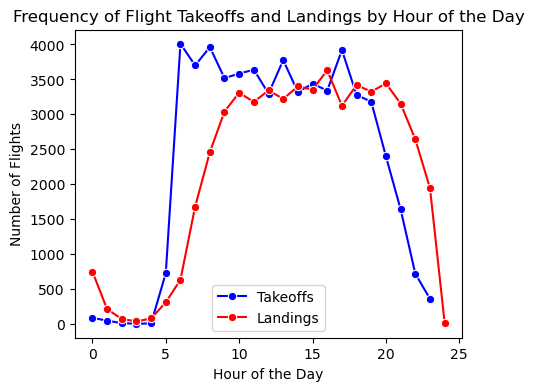

In [95]:
df_takeoff = pd.DataFrame(result1)
df_landing = pd.DataFrame(result2)
df_takeoff.columns = ['Hour', 'Takeoffs']
df_landing.columns = ['Hour', 'Landings']
plt.figure(figsize=(5, 4))
sns.lineplot(data=df_takeoff, x='Hour', y='Takeoffs', label='Takeoffs', marker='o', color='blue')
sns.lineplot(data=df_landing, x='Hour', y='Landings', label='Landings', marker='o', color='red')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Flights')
plt.title('Frequency of Flight Takeoffs and Landings by Hour of the Day')
plt.show()

#### w)Write a MongoDB query to calculate the frequency of flight takeoffs and landings within defined week of day. Generate a Suitable Plot.


In [31]:
result1 = list(db.flights.aggregate([{'$group': {'_id': '$DAY_OF_WEEK','takeoff_count': { '$sum': 1 }}},
    {'$sort': { '_id': 1 }}]))
result2 = list(db.flights.aggregate([{'$group': {'_id': '$DAY_OF_WEEK','landing_count': { '$sum': 1 }}},
    {'$sort': { '_id': 1 }}]))
result1
result2

[{'_id': 1, 'landing_count': 8539},
 {'_id': 2, 'landing_count': 7785},
 {'_id': 3, 'landing_count': 7684},
 {'_id': 4, 'landing_count': 8395},
 {'_id': 5, 'landing_count': 8886},
 {'_id': 6, 'landing_count': 6884},
 {'_id': 7, 'landing_count': 7827}]

Text(0.5, 1.0, 'Frequency of Flight Takeoffs and Landings by Day of the Week')

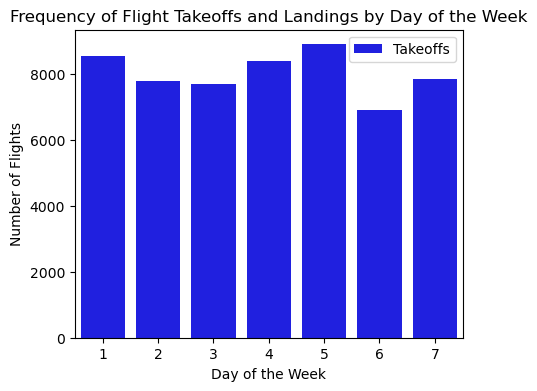

In [105]:
df_takeoff = pd.DataFrame(result1)
df_landing = pd.DataFrame(result2)
df_takeoff.columns = ['DayOfWeek', 'Takeoffs']
df_landing.columns = ['DayOfWeek', 'Landings']

plt.figure(figsize=(5, 4))
sns.barplot(data=df_takeoff, x='DayOfWeek', y='Takeoffs', color='blue', label='Takeoffs')

plt.xlabel('Day of the Week')
plt.ylabel('Number of Flights')
plt.title('Frequency of Flight Takeoffs and Landings by Day of the Week')


Text(0.5, 1.0, 'Frequency of Flight Takeoffs and Landings by Day of the Week')

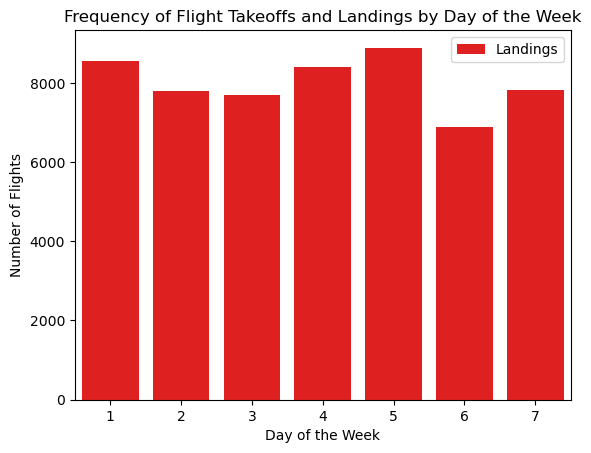

In [107]:
sns.barplot(data=df_landing, x='DayOfWeek', y='Landings', color='red', label='Landings')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Flights')
plt.title('Frequency of Flight Takeoffs and Landings by Day of the Week')


#### x)Write a MongoDB query to find all flights that departed between 6 AM and 12 PM (noon) local time, regardless of the date. Return the flightNumber, airline, and departureTime. Generate a Bar Plot using Time (x-axis) and Frequency (y-axis).

In [72]:
result = list(db.flights.aggregate([{"$match": { "DEPARTURE_TIME": {"$gte": 600, "$lt": 1200}}},
    {"$project": {"Hour": {"$floor": {"$divide": ["$DEPARTURE_TIME", 100]}}, "FLIGHT_NUMBER": "$FLIGHT_NUMBER","AIRLINE": "$AIRLINE","DEPARTURE_TIME": 
                 "$DEPARTURE_TIME"}},
    {"$group": {"_id": "$Hour", "count": {"$sum": 1}}},
    {"$sort": {"_id": 1}}]))
result

[{'_id': 6.0, 'count': 3362},
 {'_id': 7.0, 'count': 3214},
 {'_id': 8.0, 'count': 3484},
 {'_id': 9.0, 'count': 3275},
 {'_id': 10.0, 'count': 3337},
 {'_id': 11.0, 'count': 3481}]

Text(0.5, 1.0, 'Flight Departures Between 6 AM and 12 PM')

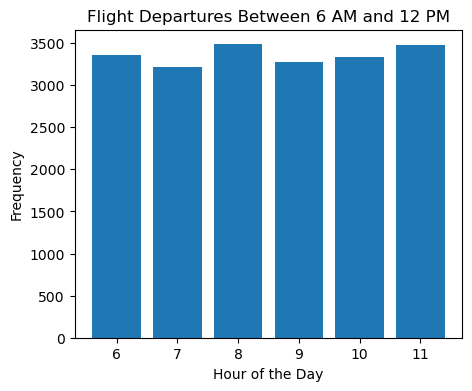

In [74]:
df = pd.DataFrame(result)
plt.figure(figsize=(5, 4))
plt.bar(df['_id'], df['count'])
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.title('Flight Departures Between 6 AM and 12 PM')

#### y)When is the best time of day/day of week/time of a year to fly with minimum delays?


In [69]:
result_hour = list(db.flights.aggregate([{"$match": {"DEPARTURE_DELAY": {"$gt": 0},"ARRIVAL_DELAY": {"$gt": 0}}},
    {"$group": {"_id": "$SCHEDULED_DEPARTURE","avg_delay": {"$avg": {"$add": ["$DEPARTURE_DELAY", "$ARRIVAL_DELAY"]}}}},
    {"$sort": {"avg_delay": 1}},
    {"$limit": 10}
]))

result_hour

[{'_id': 649, 'avg_delay': 4.0},
 {'_id': 706, 'avg_delay': 5.0},
 {'_id': 812, 'avg_delay': 7.0},
 {'_id': 2012, 'avg_delay': 8.0},
 {'_id': 513, 'avg_delay': 8.0},
 {'_id': 644, 'avg_delay': 8.0},
 {'_id': 516, 'avg_delay': 10.0},
 {'_id': 806, 'avg_delay': 10.0},
 {'_id': 328, 'avg_delay': 10.0},
 {'_id': 914, 'avg_delay': 11.0}]

In [71]:
result_day = list(db.flights.aggregate([{"$match": {"DEPARTURE_DELAY": {"$gt": 0},"ARRIVAL_DELAY": {"$gt": 0}}},
    {"$group": {"_id": "$DAY_OF_WEEK","avg_delay": {"$avg": {"$add": ["$DEPARTURE_DELAY", "$ARRIVAL_DELAY"]}}}},
    {"$sort": {"avg_delay": 1}},
    {"$limit": 10}
]))
result_day

[{'_id': 4, 'avg_delay': 75.06659623540047},
 {'_id': 5, 'avg_delay': 75.93342746611299},
 {'_id': 3, 'avg_delay': 77.53723505459638},
 {'_id': 1, 'avg_delay': 78.60739068950411},
 {'_id': 6, 'avg_delay': 79.73214956261549},
 {'_id': 2, 'avg_delay': 82.00308754531267},
 {'_id': 7, 'avg_delay': 83.36999579424167}]

In [73]:
result_hour = list(db.flights.aggregate([{"$match": {"DEPARTURE_DELAY": {"$gt": 0},"ARRIVAL_DELAY": {"$gt": 0}}},
    {"$group": {"_id": "$MONTH","avg_delay": {"$avg": {"$add": ["$DEPARTURE_DELAY", "$ARRIVAL_DELAY"]}}}},
    {"$sort": {"avg_delay": 1}},
    {"$limit": 10}
]))
result_month


[{'_id': 1, 'avg_delay': 9.783574273594827},
 {'_id': 2, 'avg_delay': 11.856709193828202},
 {'_id': 3, 'avg_delay': 14.658514558558892}]